In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import datetime
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [2]:
#read in the csv
jobs = pd.read_csv('../accre-candy-corn/accre-scheduler-data-2021/fullsample-corrected.csv')
#convert BEGIN date column to dtype datetime64[ns]
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'], errors='coerce', infer_datetime_format = True)
#convert END date column to dtype datetime64[ns]
jobs['END'] = pd.to_datetime(jobs['END'], errors='coerce', infer_datetime_format = True)


jobs['JOBLENGTH'] = jobs['END'] - jobs['BEGIN']

In [3]:
jobs['STATE'].value_counts()

COMPLETED              5871385
FAILED                 1095351
TIMEOUT                 170748
CANCELLED by 9201        43033
PREEMPTED                24563
                        ...   
CANCELLED by 888384          1
CANCELLED by 698361          1
CANCELLED by 790449          1
CANCELLED by 767493          1
CANCELLED by 889843          1
Name: STATE, Length: 544, dtype: int64

In [4]:
jobs['PARTITION'].value_counts()

production              7019578
nogpfs                   147229
pascal                   124453
sam                       64967
turing                    21424
maxwell                   11278
cgw-maizie                 4309
debug                      1616
cgw-platypus                379
cgw-dsi-gw                  228
cgw-capra1                  157
cgw-dougherty1              125
cgw-horus                    61
cgw-cqs1                     28
cgw-hanuman                  21
cgw-sideshowbob              14
cgw-vm-qa-flatearth1          9
cgw-tbi01                     8
cgw-rocksteady                1
Name: PARTITION, dtype: int64

In [5]:
jobs.groupby('STATE')['PARTITION'].value_counts()

STATE                PARTITION           
CANCELLED            pascal                    3
                     production                3
CANCELLED by 0       production              521
                     nogpfs                   38
CANCELLED by 103040  production                2
                                            ... 
TIMEOUT              cgw-sideshowbob           7
                     nogpfs                    6
                     cgw-hanuman               5
                     cgw-tbi01                 5
                     cgw-vm-qa-flatearth1      4
Name: PARTITION, Length: 769, dtype: int64

In [6]:
jobs[jobs['STATE']== 'CANCELLED by 9204'].value_counts().sum()

200

jobs['reqmem_all_nodes'] = jobs['REQMEM'].str.extract('(\d+)Mn')
jobs['reqmem_all_nodes'] = pd.to_numeric(jobs['reqmem_all_nodes'], errors = 'coerce')
jobs['reqmem_all_nodes'] = jobs['reqmem_all_nodes'] * jobs['NODES']
jobs[jobs['NODES'] == 2]
jobs['reqmem_all_CPUS'] = jobs['REQMEM'].str.extract('(\d+)Mc')
jobs['reqmem_all_CPUS'] = pd.to_numeric(jobs['reqmem_all_CPUS'], errors = 'coerce')
jobs['reqmem_all_CPUS'] = jobs['reqmem_all_CPUS'] * jobs['CPUS']
jobs.head()

In [7]:
completed_jobs = jobs[jobs['STATE']=='COMPLETED']

completed_jobs = completed_jobs.sort_values('BEGIN')

completed_jobs['ROLL1H'] = completed_jobs.rolling('1h', on = 'BEGIN')['JOBID'].count()

completed_jobs['ROLL1D'] = completed_jobs.rolling('1d', on = 'BEGIN')['JOBID'].count()

completed_jobs['ROLL1W'] = completed_jobs.rolling('7d', on = 'BEGIN')['JOBID'].count()

completed_jobs['Day'] = completed_jobs['BEGIN'].dt.day_name()

In [8]:
completed_jobs['Day of Month'] = completed_jobs['BEGIN'].dt.day

In [29]:
completed_jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,ROLL1H,ROLL1D,ROLL1W,Day,Day of Month
6640577,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096Mc,868.77M,12:00:00,00:04:20,1,1,production,0:0,0 days 00:04:20,1.0,1.0,1.0,Thursday,1
6640635,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000Mn,0.09M,2-00:00:00,00:02:20,1,1,sam,0:0,0 days 00:02:20,2.0,2.0,2.0,Thursday,1
6640627,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024Mc,221.10M,00:30:00,00:02:09,1,1,production,0:0,0 days 00:02:09,3.0,3.0,3.0,Thursday,1
6640643,24460658,COMPLETED,2020-10-01 00:14:09,2020-10-01 00:19:45,4096Mc,830.80M,12:00:00,00:05:36,1,1,production,0:0,0 days 00:05:36,4.0,4.0,4.0,Thursday,1
6640651,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000Mn,0.09M,2-00:00:00,00:02:07,1,1,sam,0:0,0 days 00:02:07,5.0,5.0,5.0,Thursday,1
6640869,24460894,COMPLETED,2020-10-01 00:25:27,2020-10-01 00:27:30,1024Mc,485.28M,00:30:00,00:02:03,1,1,production,0:0,0 days 00:02:03,6.0,6.0,6.0,Thursday,1
6640865,24460890,COMPLETED,2020-10-01 00:25:27,2020-10-01 00:28:39,4096Mc,818.73M,12:00:00,00:03:12,1,1,production,0:0,0 days 00:03:12,7.0,7.0,7.0,Thursday,1
6640912,24460941,COMPLETED,2020-10-01 00:26:26,2020-10-01 00:28:59,2000Mn,0.09M,2-00:00:00,00:02:33,1,1,sam,0:0,0 days 00:02:33,8.0,8.0,8.0,Thursday,1
6640985,24461017,COMPLETED,2020-10-01 00:31:00,2020-10-01 06:05:07,45056Mn,11792.66M,1-00:00:00,05:34:07,1,3,production,0:0,0 days 05:34:07,9.0,9.0,9.0,Thursday,1
6641186,24461225,COMPLETED,2020-10-01 00:36:29,2020-10-01 00:40:50,4096Mc,860.00M,12:00:00,00:04:21,1,1,production,0:0,0 days 00:04:21,10.0,10.0,10.0,Thursday,1


In [9]:
print(jobs[jobs['JOBLENGTH'] < '0 days 00:00:00' ].value_counts().sum())
print(completed_jobs[completed_jobs['JOBLENGTH'] < '0 days 00:00:00' ].value_counts().sum())
#Some jobs have negative timedeltas

69
60


In [10]:
#remove jobs that have a negative time delta
completed_jobs = completed_jobs[completed_jobs['JOBLENGTH'] >= '0 days 00:00:00']

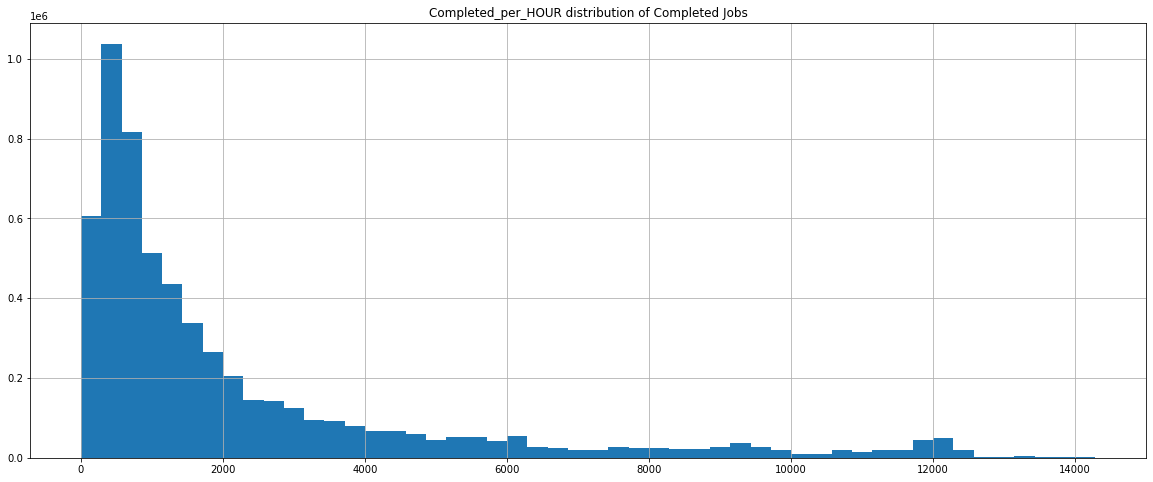

In [11]:
completed_jobs.hist('ROLL1H', bins = 50, figsize = (20,8))
plt.title('Completed_per_HOUR distribution of Completed Jobs');

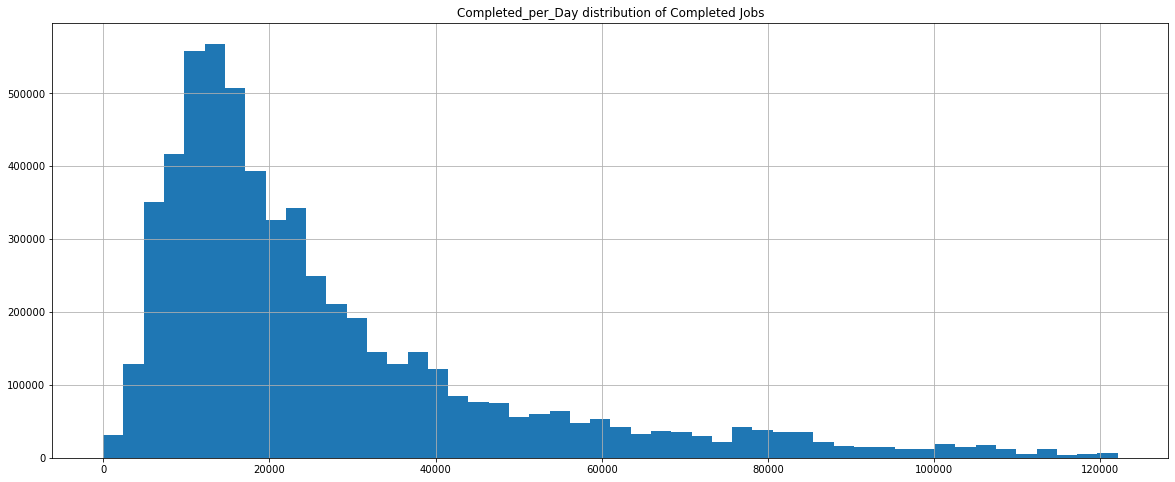

In [12]:
completed_jobs.hist('ROLL1D', bins = 50, figsize = (20,8))
plt.title('Completed_per_Day distribution of Completed Jobs');

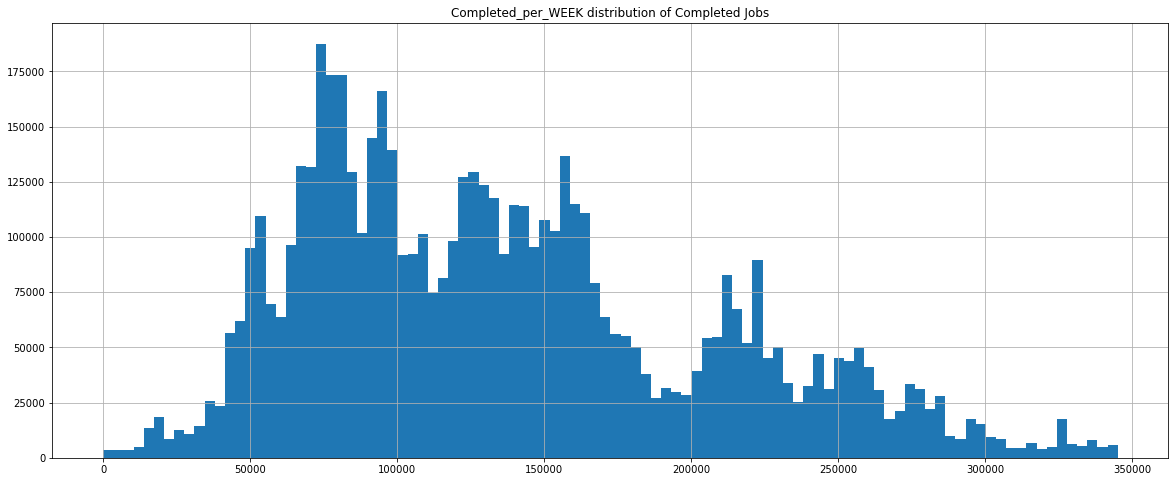

In [13]:
completed_jobs.hist('ROLL1W', bins = 100, figsize = (20,8))
plt.title('Completed_per_WEEK distribution of Completed Jobs');

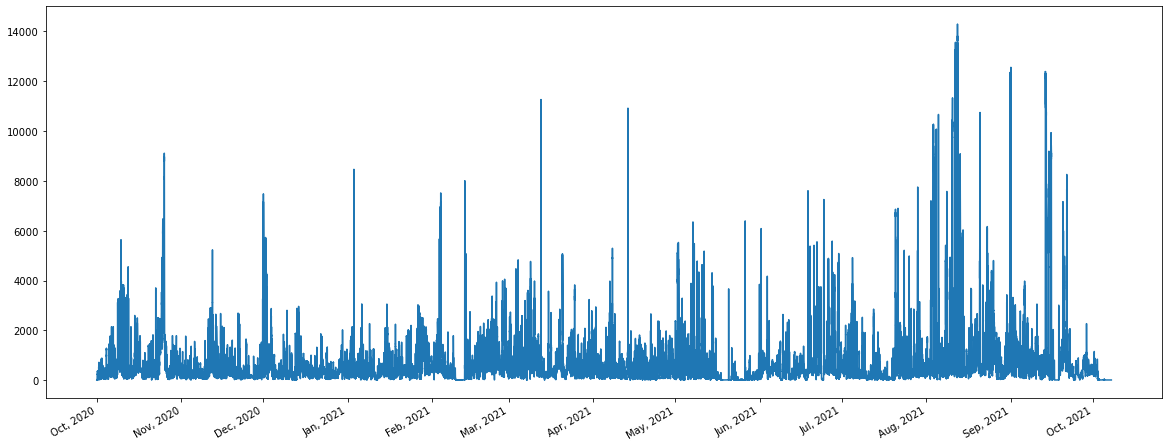

In [62]:
BEGIN_completed_jobs = completed_jobs['BEGIN']
ROLL1H = completed_jobs['ROLL1H']
month_year_formatter = mdates.DateFormatter('%b, %Y') # The "," is intentional.
half_year_locator = mdates.MonthLocator(interval=1)
#year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month
monthly_locator = mdates.MonthLocator()

fig, ax = plt.subplots(figsize=(20, 8))
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.plot(BEGIN_completed_jobs, ROLL1H,)

fig.autofmt_xdate()
#completed_jobs.plot(kind = 'line', x = 'BEGIN', y = 'ROLL1H', figsize = (20,8));
#try to color this by day of the week.

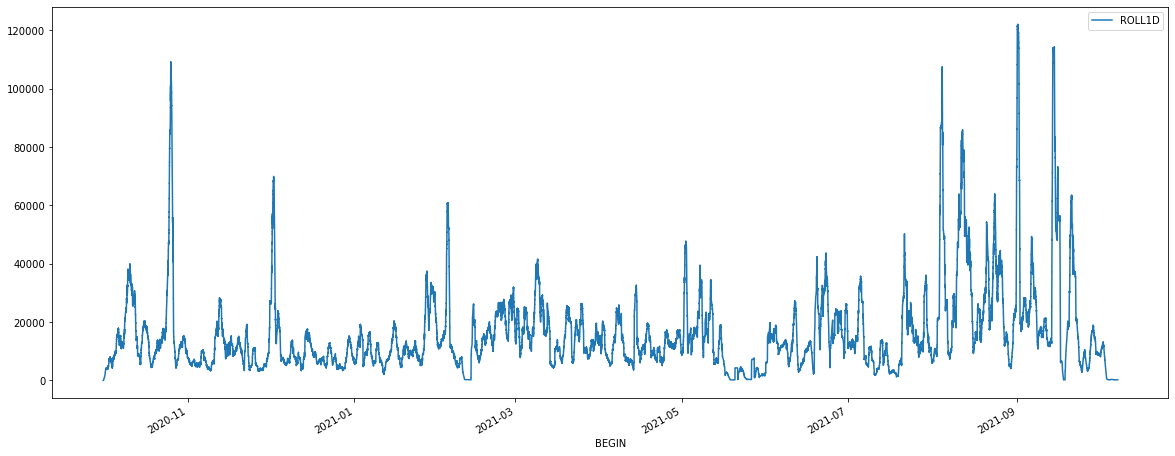

In [15]:
completed_jobs.plot(kind = 'line', x = 'BEGIN', y = 'ROLL1D', figsize = (20,8));

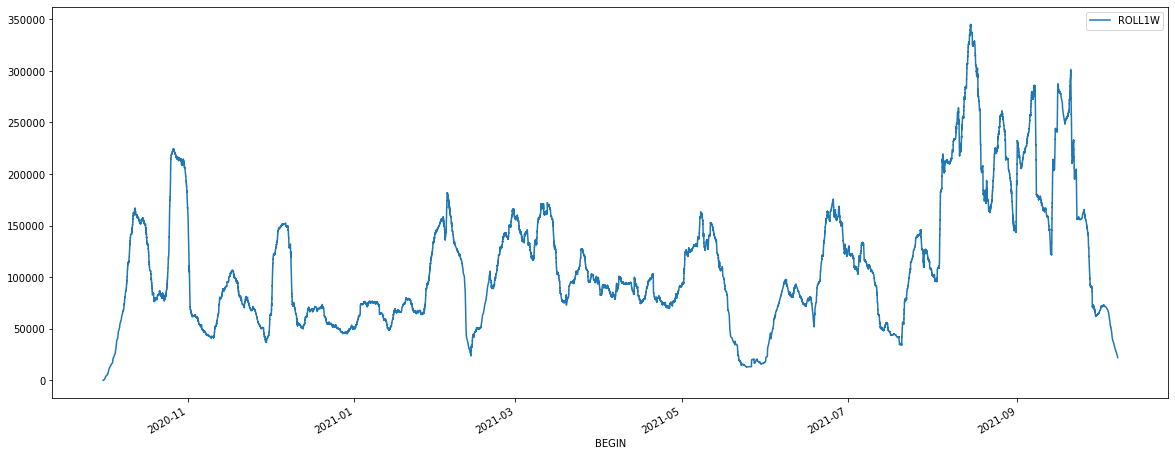

In [16]:
completed_jobs.plot(kind = 'line', x = 'BEGIN', y = 'ROLL1W', figsize = (20,8));

In [17]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

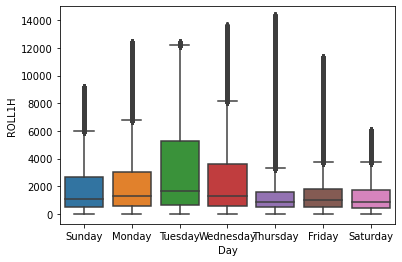

In [18]:
sns.boxplot(data=completed_jobs, x = 'Day', y ='ROLL1H', order = order);

In [19]:
completed_jobs['JOBLENGTH'].describe()

count                      5871325
mean     0 days 03:31:12.926898953
std      0 days 10:33:39.736559614
min                0 days 00:00:00
25%                0 days 00:03:49
50%                0 days 00:15:29
75%                0 days 01:32:55
max               22 days 23:14:34
Name: JOBLENGTH, dtype: object

facetgrid_completed_jobs = sns.FacetGrid(completed_jobs, col='Day') #initializes the grid and selects which column to use 
facetgrid_completed_jobs.map(sns.lineplot, "BEGIN", "ROLL1H");

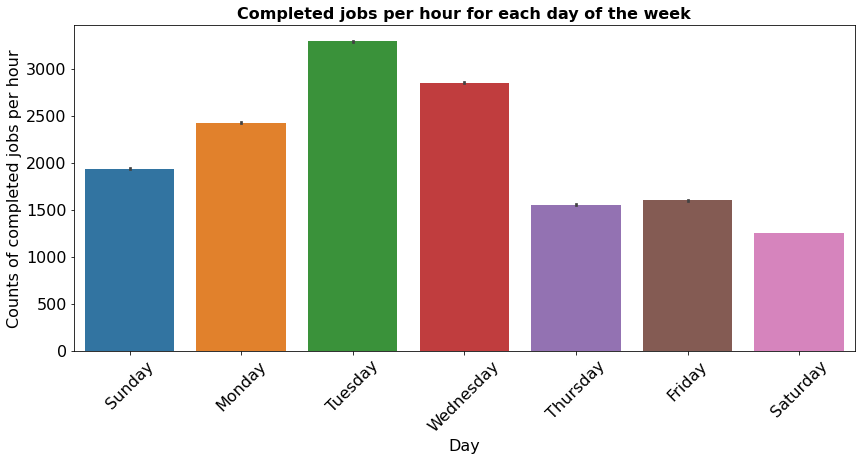

In [20]:
fontsize = 16
plt.subplots(figsize = (14, 6))
sns.barplot(data = completed_jobs, x = 'Day', y = 'ROLL1H', order = order)
plt.xticks(fontsize = fontsize, rotation = 45)
plt.xlabel('Day', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('Completed jobs per hour for each day of the week', fontsize = fontsize, fontweight = 'bold');

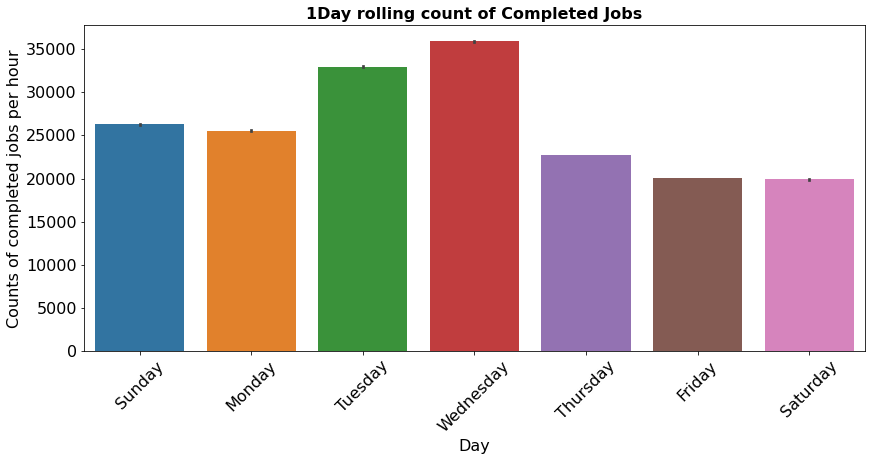

In [21]:
fontsize = 16
plt.subplots(figsize = (14, 6))
sns.barplot(data = completed_jobs, x = 'Day', y = 'ROLL1D', order = order)
plt.xticks(fontsize = fontsize, rotation = 45)
plt.xlabel('Day', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('1Day rolling count of Completed Jobs', fontsize = fontsize, fontweight = 'bold');

In [22]:
#completed_jobs.groupby('Day')['JOBLENGTH'].value_counts().plot(kind = 'bar')

Sunday--> Submit your job and hope it's done for Monday morning
Monday--> Well that didn't work so lets make some changes and resubmit. 
Tuesday--> 

g = sns.FacetGrid(completed_jobs, col="BEGIN", row="ROLL1D", margin_titles=True)
g.completed_jobs(sns.scatterplot, x="BEGIN", y="ROLL1D")
g.set_axis_labels("Total bill ($)", "Tip ($)")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()

In [51]:

# Subset data
#subset = comp[(data["date"].dt.year == 2004) & (data["date"].dt.month == 1)]

# Extract hour, day, and temperature
hour = completed_jobs['BEGIN'].dt.hour
day = completed_jobs['BEGIN'].dt.day
ROLL1H = completed_jobs['ROLL1H']

# Re-arrange temperature values
ROLL1H = ROLL1H.values.reshape(24, len(day.nunique()), order="F")

# Compute x and y grids, passed to `ax.pcolormesh()`.

# The first + 1 increases the length
# The outer + 1 ensures days start at 1, and not at 0.
xgrid = np.arange(day.max() + 1) + 1

# Hours start at 0, length 2
ygrid = np.arange(25)

TypeError: object of type 'int' has no len()

ValueError: not enough values to unpack (expected 2, got 1)

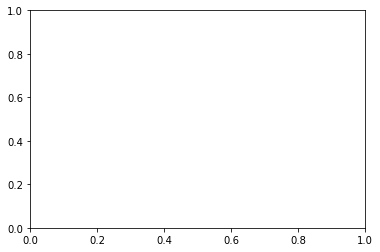

In [40]:
fig, ax = plt.subplots()
ax.pcolormesh(xgrid, ygrid, ROLL1H)
ax.set_frame_on(False) # remove all spines

In [67]:
MIN_TEMP = completed_jobs["ROLL1H"].min()
MAX_TEMP = completed_jobs["ROLL1H"].max()

In [68]:
def single_plot(data, month, year, ax):
    data = completed_jobs[(completed_jobs["BEGIN"].dt.year == year) & (completed_jobs["BEGIN"].dt.month == month)]

    hour = data["hour"]
    day = data["date"].dt.day
    temp = completed_jobs["ROLL1H"]
    temp = temp.values.reshape(24, len(day.unique()), order="F")
    
    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, temp, cmap="magma", vmin=MIN_TEMP, vmax=MAX_TEMP)
    # Invert the vertical axis
    ax.set_ylim(24, 0)
    # Set tick positions for both axes
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)

KeyError: 'hour'

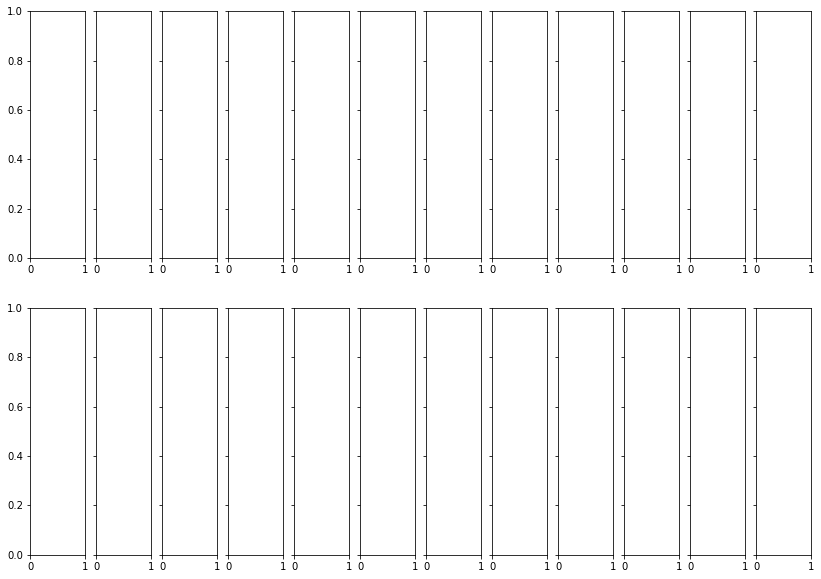

In [70]:
fig, axes = plt.subplots(2, 12, figsize=(14, 10), sharey=True)

for i, year in enumerate([2004, 2005]):
    for j, month in enumerate(range(1, 13)):
        single_plot(completed_jobs, month, year, axes[i, j])

# Adjust margin and space between subplots
# Extra space is on the left to add a label
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.08, wspace=0.04)

In [ ]:
# First, let's make some room for the legend in the bottom.
fig.subplots_adjust(bottom=0.15)

# Create a new axis to contain the color bar
# Values are:
# (x coordinate of left border, 
#  y coordinate for bottom border,
#  width,
#  height)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])

# Create a normalizer that goes from minimum to maximum temperature
norm = mc.Normalize(MIN_TEMP, MAX_TEMP)

# Create the colorbar and set it to horizontal
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="magma"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal"
)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label
cb.set_label("Temperature", size=12)
fig

In [ ]:
# Set common labels for x and y axes
fig.text(0.5, 0.1, "Day", ha="center", va="center", fontsize=14)
fig.text(0.02, 0.5, 'Hour Commencing', ha="center", va="center", rotation="vertical", fontsize=14)

fig.suptitle("Hourly temperatures - Station T0001", fontsize=20, y=0.95)
fig

In [36]:
sns.heatmap(completed_jobs['ROLL1H'], robust=True, cmap='YlGnBu', yticklabels=False, xticklabels=5, cbar=False)

IndexError: Inconsistent shape between the condition and the input (got (5871325, 1) and (5871325,))

In [53]:
x = completed_jobs['BEGIN']

In [54]:
y = completed_jobs['ROLL1H']

AttributeError: 'AxesSubplot' object has no attribute 'lineplot'

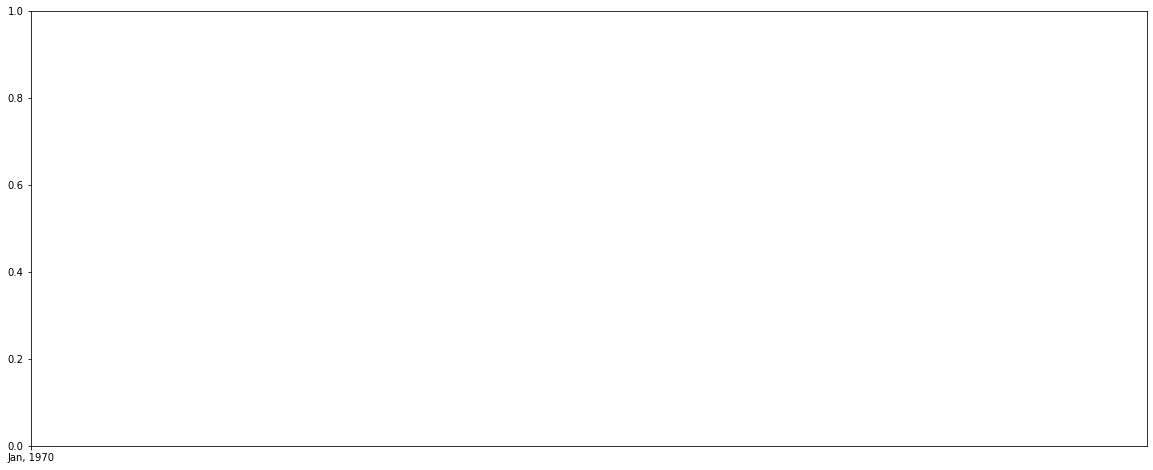

In [66]:
BEGIN_completed_jobs = completed_jobs['BEGIN']
ROLL1H = completed_jobs['ROLL1H']
month_year_formatter = mdates.DateFormatter('%b, %Y') # The "," is intentional.
half_year_locator = mdates.MonthLocator(interval=1)
#year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month
monthly_locator = mdates.MonthLocator()

fig, ax = plt.subplots(figsize=(20, 8))
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.lineplot(BEGIN_completed_jobs, ROLL1H, cmap=cmap, edgecolor='white')


fig.autofmt_xdate()

### make a custom colormap with transparency
ncolors = 512
color_array = plt.get_cmap('YlOrRd')(range(ncolors))
color_array[:, -1] = np.linspace(0, 1, ncolors)
cmap = LinearSegmentedColormap.from_list(name='YlOrRd_alpha', colors=color_array)

#plt.hist2d(x, y, bins=[30, 30], cmap=cmap, edgecolor='white')
#plt.show()